In [1]:
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import shapely.geometry as sgeom

%matplotlib inline

In [2]:
timescale = 20
DJF_bool = '_DJFonly'
cesta = '/mnt/data04/model/CMAM/0A.daily/composites_woSSW{}/'.format(DJF_bool)

In [18]:
var_ls = ['sink','lwatend_logH']
var_ls = ['vmrh2o']#'ta'
e_type_ls = ['himalayas', 'eastasia', 'westamer']
"""if var == 'vmro3':
    what_ls = ['percentages', 'absolute']
else:"""
what_ls = ['anomalies']#
what_ls = ['percentages']#, 'absolute']
da_ls2 = []

for what in what_ls:
    da_ls = []
    print(what)
    for i,e_type in enumerate(e_type_ls):
        print(e_type)
        ds_ls = []
        for var in var_ls:
            ds = xr.open_dataset(f'{cesta}{var}_{what}_comp_{e_type}_{timescale}days.nc')
            if var not in ['lwa','sink', 'lwatend_logH']:
                ds['plev'] = ds.plev/100.
            else:
                ds = ds.rename({'z': 'plev'})
            ds_ls.append(ds)
        da = xr.merge(ds_ls)

        da_ls.append(da)
    da_conc = xr.concat(da_ls, dim = 'e_type')
    da_conc['e_type'] = e_type_ls
    da_ls2.append(da_conc)
        
da_all = xr.concat(da_ls2, dim = 'what')
da_all['what'] = what_ls
da_all

percentages
himalayas
eastasia
westamer


<xarray.Dataset>
Dimensions:  (e_type: 3, lag: 21, lat: 48, lon: 96, plev: 63, what: 1)
Coordinates:
  * plev     (plev) float64 1e+03 925.0 850.0 800.0 ... 0.0015 0.001 0.0007
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * lag      (lag) int64 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10
  * e_type   (e_type) <U9 'himalayas' 'eastasia' 'westamer'
  * what     (what) <U11 'percentages'
Data variables:
    vmrh2o   (what, e_type, lag, plev, lat, lon) float32 8.93 9.266 ... 20.94

In [7]:
ds_all_sel

<xarray.DataArray 'vmrh2o' (what: 1, e_type: 1, plev: 35, lat: 24, lon: 96)>
array([[[[[ 7.3094822e-07,  4.8999151e-05,  4.5390170e-05, ...,
            8.4317617e-06,  4.9504422e-05,  1.1210487e-05],
          [ 2.0867137e-05,  2.9075582e-05,  5.6426241e-05, ...,
            2.1563177e-05,  9.8288823e-05,  6.5266322e-05],
          [ 8.2302267e-06,  5.0985731e-05,  8.4608771e-05, ...,
           -6.8007575e-05, -4.3123928e-05, -2.6138528e-05],
          ...,
          [-9.5383037e-08,  1.5797015e-06,  4.0015934e-06, ...,
            6.2630380e-07, -3.7990557e-07, -7.2915282e-07],
          [ 2.3386831e-06,  6.5175158e-07, -9.5619066e-07, ...,
            7.0617525e-06,  5.6373465e-06,  4.0293066e-06],
          [ 2.4549627e-06,  2.0519094e-06,  1.6676900e-06, ...,
            3.5615019e-06,  3.2299429e-06,  2.8547117e-06]],

         [[-1.1066779e-05,  3.8799084e-05,  3.8726477e-05, ...,
           -7.0733809e-06,  2.8487941e-05,  3.7974269e-06],
          [ 6.9256691e-07,  5.9833274e-06,  3.6247005e-05, ...,
            1.3525369e-06,  4.9998274e-05,  2.0327125e-05],
          [-8.0523132e-06,  1.7563783e-05,  5.5812288e-05, ...,
           -6.4092535e-05, -3.3659362e-05, -3.1855405e-05],
...
           -9.4978127e-08, -9.0243063e-08, -8.6201183e-08],
          [-8.5003947e-08, -8.8837581e-08, -9.3676164e-08, ...,
           -7.8207862e-08, -7.9917690e-08, -8.2092591e-08],
          [-6.1625087e-08, -6.4245540e-08, -6.6788843e-08, ...,
           -5.3481006e-08, -5.6228021e-08, -5.8947364e-08]],

         [[-7.5151128e-08, -5.5092961e-08, -5.8233937e-08, ...,
           -9.7078335e-08, -1.0762051e-07, -1.0837200e-07],
          [-8.0919762e-08, -8.4621817e-08, -7.9597910e-08, ...,
           -8.2618349e-08, -7.4171702e-08, -7.6420413e-08],
          [-7.0269948e-08, -7.8548105e-08, -6.9463681e-08, ...,
           -4.9419601e-08, -5.9031418e-08, -6.6368123e-08],
          ...,
          [-8.4254616e-08, -8.8016428e-08, -9.2044623e-08, ...,
           -7.5946197e-08, -7.7941543e-08, -8.0826219e-08],
          [-1.1184011e-07, -1.1322302e-07, -1.1466743e-07, ...,
           -1.0766905e-07, -1.0912931e-07, -1.1049295e-07],
          [-6.8358297e-08, -7.0245555e-08, -7.2100093e-08, ...,
           -6.2508271e-08, -6.4487978e-08, -6.6438787e-08]]]]],
      dtype=float32)
Coordinates:
  * plev     (plev) float64 300.0 285.0 250.0 200.0 170.0 ... 0.3 0.2 0.15 0.1
  * lat      (lat) float64 1.856 5.567 9.278 12.99 ... 76.07 79.78 83.48 87.16
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
    lag      int64 0
  * e_type   (e_type) <U9 'himalayas'
  * what     (what) <U9 'anomalies'

In [30]:
plev_start = 1000
plev_end = 0.1 # 50
lat_start = 0#-20
ds_all_sel = da_all[var].sel(
    lag = 0, 
    e_type = ['himalayas'],
    lat = slice(lat_start,None), 
    plev = slice(plev_start,plev_end)
).mean('lon').squeeze()
lat = ds_all_sel.lat.values
lev = ds_all_sel.plev.values

vmrh2o_percentages_all_20days_zm_wsignificance_DJFonly.pdf


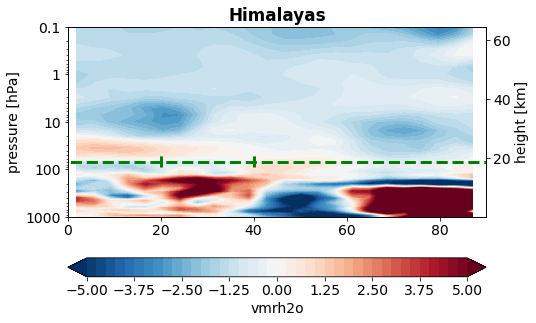

In [34]:
levels = np.linspace(-5,5,41)
titles = ['Himalayas', 'East Asia', 'West America']
#var = 'vmro3'
#anomalies
mpl.rcParams.update({'font.size': 14})
cbar_kwargs = dict(orientation = 'horizontal')
p = ds_all_sel.plot.contourf(x= 'lat', \
                                                               y = 'plev', \
                                                               yincrease = False, size = 5,\
                                                               levels = levels, center=0, robust = True,\
                                                               add_colorbar = True, cbar_kwargs = cbar_kwargs)

"""p.data = (da_all.sel(what = what_ls[1])) #-273.15
if var == 'vmro3':
    
    lev0 = [1e-5]
    dashed = False
    cbar_label = 'ozone volume mixing ratio [%]'
elif var == 'ta':
    levels2 = [200,220,240,260]
    lev0 = [273.15]
    dashed = False
    cbar_label = 'temperature [K]'
elif var == 'ua':
    levels2 = [1,3,5,10,30,50,80]
    lev0 = [0]
    dashed = True
    cbar_label = 'zonal wind [m/s]'
    
plot_kwargs = dict(yincrease = False, \
                   colors = 'grey', \
                   levels=levels2, add_colorbar=False, alpha =1 ) #0.7 #
p.map_dataarray(xr.plot.contour, 'lat', 'plev', **plot_kwargs)

if dashed:
    plot_kwargs['linestyles'] = 'dashed'
    plot_kwargs['levels'] = np.array(levels2)[::-1]*-1
    p.map_dataarray(xr.plot.contour, 'lat', 'plev', **plot_kwargs)

plot_kwargs['linestyles'] = 'solid'
plot_kwargs['levels'] = lev0
plot_kwargs['linewidths'] = 3
plot_kwargs['alpha'] = 1


#p.map_dataarray(xr.plot.contour, 'lat', 'plev', **plot_kwargs)

sel_dict = dict(plev = slice(None, 0.1), lat = slice(-20,None))
p.data  = ds_p[var].sel(**sel_dict)
plot_kwargs2 = dict(levels = [0,0.05], hatches=['\\\\',None], \
                                colors='none', add_colorbar=False, \
                                 yincrease = False)
#p.map_dataarray(xr.plot.contourf, 'lat', 'plev', **plot_kwargs2)

plot_kwargs2['levels'] = [0,0.01]
plot_kwargs2['hatches'] = ['////',None]
#p.map_dataarray(xr.plot.contourf, 'lat', 'plev', **plot_kwargs2)
"""

ax = p.axes
ax.set_ylabel('pressure [hPa]')
ax.set_xlabel('')
ax.set_xlabel('latitude [degree]')
ax.set_xlabel('')


ax.hlines(70,-20,90, color = 'green', linestyles='--', linewidths = 3)
box = sgeom.box(minx=70, maxx=105, miny=20, maxy=40)
ax.vlines(list(box.bounds)[1::2],90,50, color = 'green', linestyles='--', linewidths = 3)
    
ax.axis([0, 90, 1000, 0.1])
ax.set_yscale('log')
ax.set_yticks([1000,100,10,1,0.1])
#ax.set_title('')#
ax.set_title(titles[0], fontdict=dict(fontweight = 'bold'))
fmt = mpl.ticker.FormatStrFormatter("%g")
ax.yaxis.set_major_formatter(fmt)
ax.set_xticks([0,20,40,60,80])

ax2 = ax.twinx()
ax2.get_shared_y_axes()
ax2.axis([0, 90, 7*np.log(1013.25/1000), 7*np.log(1013.25/0.1)])
ax2.tick_params(direction='out', which='both', labelsize=14)
if i != 2:
    ax2.set_yticklabels([])
if i == 2:
    ax2.set_ylabel('height [km]')


"""p.fig.subplots_adjust(right=0.875)
cbar_ax = p.fig.add_axes([0.075, -0.03, .8, .03])
cmap = mpl.cm.RdBu_r
norm = mpl.colors.BoundaryNorm(levels[1:-1], cmap.N)
label = cbar_label
cb2 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap,  \
                                norm=norm, orientation='horizontal', \
                                boundaries=levels, extend='both',  label = cbar_label, \
                                ticks=[-4,-3,-2,-1,0,1,2,3,4], spacing='proportional')"""

outfile='{}_{}_{}_{}days_zm_wsignificance_DJFonly.pdf'.format(var, what_ls[0], 'all', timescale)
print(outfile)
#plt.savefig(outfile, dpi = 300, bbox_inches='tight')